In [1]:
# Install panda numpy matblotlib and seaborn
# !pip install pandas numpy matplotlib seaborn

# install openpyxl to  read excel files (.xlsx)
# !pip install openpyxl

In [2]:
# import Pandas as pd and Numpy as np for numerical and data analysis
import numpy as np
import pandas as pd

# import seaborn and matplotlib as plt for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# additional setting to supress warings
import warnings
warnings.filterwarnings('ignore')

### Load the data file source

In [3]:
# load and read dataset file
loan_data = pd.read_csv("loan.csv")

### Exploring the data

In [4]:
# check dimension of dataframe
loan_data.shape

(39717, 111)

In [5]:
# view first 5 rows of loan data frame
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# get information concise summary about data
loan_data.info(max_cols=len(loan_data.columns)) # explictly mention max_cols to no of cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [7]:
# get columns header name
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
# check for duplicate rows in dataset
duplicate_row_count = loan_data.duplicated(subset=None, keep='first').count()
print(duplicate_row_count)

# size of loan dataset
total_no_of_rows = len(loan_data)
print(total_no_of_rows)

# if both are equal that implies there is no duplicate
if(total_no_of_rows == duplicate_row_count):
    print("No duplicate rows.")


39717
39717
No duplicate rows.


In [9]:
# check null count 
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Data Cleaning

In [10]:
# removing all columns with null values 
loan_data.dropna(axis=1, how='all', inplace=True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
# check shape of dataframe
loan_data.shape
## now we have 57 columns and previous we had 111 columns

(39717, 57)

In [12]:
# exploring unique value
# loan_data["pymnt_plan"]
loan_data["pymnt_plan"].unique().sum()
loan_data["pymnt_plan"].is_unique

False

In [13]:
# check is entire column has same value.
# if so, list out those column name
single_valued_columns = []

for column in loan_data.columns:
    if loan_data[column].nunique() == 1: # only one unique value
        single_valued_columns.append(column)

print("Single-valued columns:", single_valued_columns)

Single-valued columns: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [14]:
# columns with single value which doesn't make much sense or contribute to analysis
single_valued_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [15]:
# removing single valued column as it have very little or no impact
loan_data.drop(single_valued_columns,axis=1, inplace=True)


In [16]:
# display first 5 rows after removal of single valued column
loan_data.head()

# now we have 48 columns left 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [17]:
# name of available colums 
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

##### dropping few more additional columns
some columns are valid only after loan is approved. They are:
- delinq_2yrs
- last_pymnt_d
- total_rec_late_fee
- last_pymnt_amnt
- next_pymnt_d
- revol_bal
- out_prncp
- total_rec_prncp
- total_pymnt
- total_rec_int
- recoveries
- chargeoff_within_12_mths
- collection_recovery_fee
- mths_since_last_record
- mths_since_last_delinq
- last_credit_pull_d



so we can remove these columns are they are not contibuting in decision making of loan application.

Additionally few more columns with   
- `desc`, `zip_code`,`addr_state` -> has text information and makes more sense for already approved or current loans 
- `memeber_id` -> is also not useful in determining loan
- `out_prncp_inv`  and `total_pymnt_inv` -> is releavent for investors and doesn't impact prediction of loan approval or rejection process.
- `url` -> is not relevant in determining loan  as it contains URL for the LC page.
- `id` -> is index variable which has unique values but doesn't help on determining loan approval. 
- `title`, `emp_title` -> are descriptive text or noun does't contibute in analysis.

In [18]:
# droping columns which is vaild post approval of loan
loan_data.drop(["delinq_2yrs",
"last_pymnt_d",
"total_rec_late_fee",
"last_pymnt_amnt",
"next_pymnt_d",
"revol_bal",
"out_prncp",
"total_rec_prncp",
"total_pymnt",
"total_rec_int",
"recoveries",
"collection_recovery_fee",
"mths_since_last_record",
"mths_since_last_delinq",
"out_prncp_inv",
"total_pymnt_inv",
"desc",
"member_id",
# "id", 
"title", 
"emp_title",
"last_credit_pull_d",
"url", 
"zip_code",
"addr_state"], axis = 1, inplace = True)

In [19]:
# check dimension of the loan dataset
loan_data.shape

(39717, 24)

In [20]:
# get name of all columns
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [21]:
# check for concise information summary about data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [22]:
# Drop the rows where loan_status is current as there are active loan and is under repayment
loan_df = loan_data[loan_data['loan_status'] != "Current"]

In [23]:
# check of loan status uniqiue values
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [24]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0


In [25]:
# check percentage missing values
(loan_df.isna().sum()/len(loan_df.index))*100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#### Handle missing values
we have missing values for emp_length, revol_util, pub_rec_bankruptcies.
let's drop missing values for columns less than 2% and fill with mode/median value for greater than 2%.


In [26]:
# check type of emp_length
loan_df["emp_length"].dtypes

dtype('O')

In [27]:
# calculate mode of emp_length
emp_len_mode = loan_df.emp_length.mode()[0]
print("Mode : " + emp_len_mode)

# Diplay count by emp_length
loan_df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

Now, we can notice that mode value has higher frequency count than next most frequency value. Thus, it will be safe to assign mode value to null and missing values. Also, missing value percentage is very less so it won't make much impact.

In [28]:
loan_df["emp_length"].fillna(emp_len_mode, inplace=True)
loan_df["emp_length"].isna().sum()

np.int64(0)

In [29]:
# drop missing value for revol_util as it's very few and less than 2% 
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True) 
loan_df["revol_util"].isna().sum()

np.int64(0)

In [30]:
# drop missing value for pub_rec_bankruptcies as it's very few and less than 2% 
loan_df.dropna(axis = 0, subset = ['pub_rec_bankruptcies'] , inplace = True) 
loan_df["pub_rec_bankruptcies"].isna().sum()

np.int64(0)

In [31]:
# check shape of dataframe
loan_df.shape

(37830, 24)

In [32]:
# check for concise information summary about data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37830 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37830 non-null  int64  
 1   loan_amnt             37830 non-null  int64  
 2   funded_amnt           37830 non-null  int64  
 3   funded_amnt_inv       37830 non-null  float64
 4   term                  37830 non-null  object 
 5   int_rate              37830 non-null  object 
 6   installment           37830 non-null  float64
 7   grade                 37830 non-null  object 
 8   sub_grade             37830 non-null  object 
 9   emp_length            37830 non-null  object 
 10  home_ownership        37830 non-null  object 
 11  annual_inc            37830 non-null  float64
 12  verification_status   37830 non-null  object 
 13  issue_d               37830 non-null  object 
 14  loan_status           37830 non-null  object 
 15  purpose               37

#### Data conversion


In [33]:
# loan_amnt and funded_amnt is int64 but better suited type is float so conveting to float64
loan_df = loan_df.astype({'loan_amnt': "float", "funded_amnt":"float"})

In [34]:
# convert term column to integer as it contains month values
loan_df["term"] = loan_df["term"].apply(lambda x: int(x[:-7]))

In [35]:
# Convert int_rate to float by removing the % character at end
loan_df['int_rate'] = loan_df["int_rate"].apply(lambda x: float(x[:-1]))

In [36]:
loan_df["int_rate"].head(2)

0    10.65
1    15.27
Name: int_rate, dtype: float64

In [37]:
# Convert int_rate to numeric by removing the % character at end
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))

In [38]:
# convert emp_length to numerical data to get better statistical analysis
# Define mapping of emp_length categories to numerical values
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Replace values in loan_df['emp_length'] column using the defined mapping
loan_df['emp_length'] = loan_df['emp_length'].replace(emp_length_mapping)

In [39]:
# Displaying information about the loan_df DataFrame
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37830 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37830 non-null  int64  
 1   loan_amnt             37830 non-null  float64
 2   funded_amnt           37830 non-null  float64
 3   funded_amnt_inv       37830 non-null  float64
 4   term                  37830 non-null  int64  
 5   int_rate              37830 non-null  float64
 6   installment           37830 non-null  float64
 7   grade                 37830 non-null  object 
 8   sub_grade             37830 non-null  object 
 9   emp_length            37830 non-null  int64  
 10  home_ownership        37830 non-null  object 
 11  annual_inc            37830 non-null  float64
 12  verification_status   37830 non-null  object 
 13  issue_d               37830 non-null  object 
 14  loan_status           37830 non-null  object 
 15  purpose               37

In [40]:
# Convert issue_d column from object to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

#### Check for Outlier

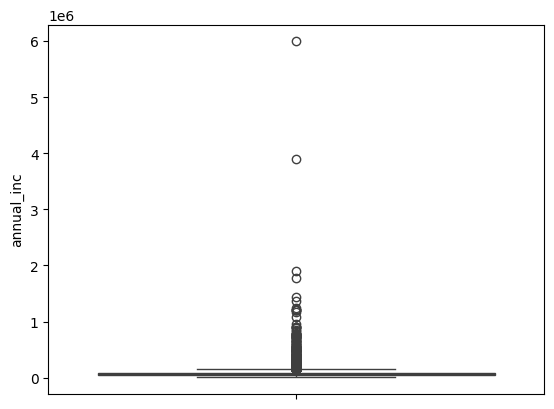

In [41]:
sns.boxplot(loan_df['annual_inc'])
plt.show()

In [42]:
# the above diagram clearly shows presence of outliers
# check quantile info
quant_info = loan_df["annual_inc"].quantile([0.5, 0.2, 0.50,0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     59000.0
0.20     37440.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [43]:
# values above 98 percentile seems to be disconnected
# taking threshold has 0.98
annual_inc_per_98 = loan_df['annual_inc'].quantile(0.98)
loan_df = loan_df[loan_df.annual_inc <= annual_inc_per_98]

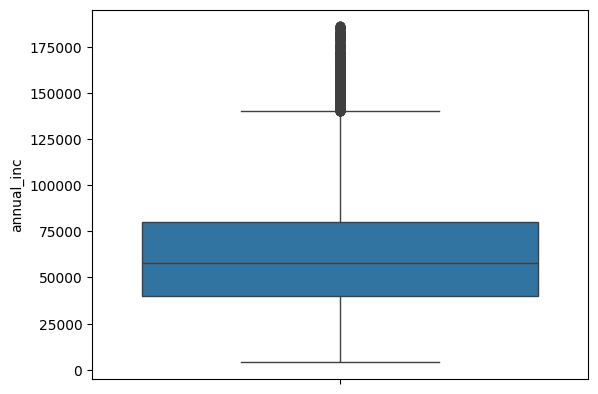

In [44]:

# show boxplot for annual_inc
sns.boxplot(loan_df.annual_inc)
plt.show()

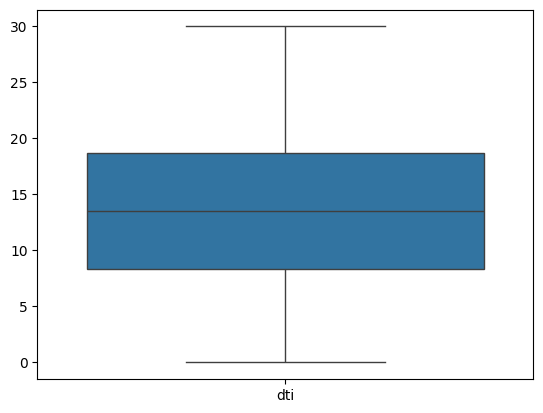

In [45]:
# analize dti
sns.boxplot([loan_df.dti])
plt.show()

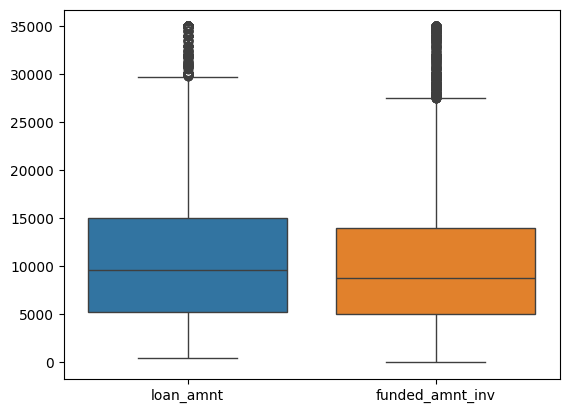

In [46]:
# draw boxplot for loan_amnt and funded_amnt_inv
sns.boxplot([loan_df.loan_amnt,loan_df.funded_amnt_inv])
plt.show()

we can see some vaules are bit outside Q3 distibution, still distibution looks continuous and there is no need to remove these values. 

##### Adding derived column  

In [47]:
# Adding additional column named 'issue_year' and 'issue_month' to facilitate analysis by month and year.
loan_df['issue_year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [48]:
# Adding additional column name 'loan_scaling?' where loan_amnt greater than funded_amnt
loan_df['loan_scaling?'] = np.where(loan_df['loan_amnt']>loan_df['funded_amnt'],'Yes','No')

In [49]:
# summary dataset distibution
loan_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
count,3.707400e+04,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000,37074.000000
mean,6.851419e+05,10912.729271,10652.974456,10226.881350,41.991261,11.927067,317.850055,5.086449,63961.499035,2010-11-14 08:28:35.229001728,13.415063,0.864973,9.238442,0.056482,48.805255,21.956034,0.044047,2010.358526,7.157577
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4000.000000,2007-08-01 00:00:00,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2007.000000,1.000000
25%,5.198945e+05,5200.000000,5031.250000,5000.000000,36.000000,8.940000,164.895000,2.000000,40000.000000,2010-05-01 00:00:00,8.312500,0.000000,6.000000,0.000000,25.400000,13.000000,0.000000,2010.000000,4.000000
50%,6.620800e+05,9600.000000,9250.000000,8825.000000,36.000000,11.780000,274.910000,5.000000,57900.000000,2011-02-01 00:00:00,13.520000,1.000000,9.000000,0.000000,49.200000,20.000000,0.000000,2011.000000,7.000000
75%,8.318085e+05,15000.000000,14800.000000,14000.000000,36.000000,14.420000,417.580000,9.000000,80000.000000,2011-08-01 00:00:00,18.670000,1.000000,12.000000,0.000000,72.300000,29.000000,0.000000,2011.000000,10.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,186000.000000,2011-12-01 00:00:00,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,2.000000,2011.000000,12.000000
std,2.009718e+05,7224.919310,6966.434374,6864.764127,10.387394,3.699108,203.981403,3.595246,32235.782958,NaN,6.648492,1.064834,4.366668,0.239906,28.296019,11.337219,0.205859,0.810248,3.380848


In [50]:
# Get summary - statistical number for Q1, Q2, Q3 and max value on interest rate
loan_df['int_rate'].describe()

count    37074.000000
mean        11.927067
std          3.699108
min          5.420000
25%          8.940000
50%         11.780000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [51]:
# Assign labels to the bins based on their indices
int_labels = ['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-24%']

# Creating bins for 'int_rate' column and assigning labels for different interest rate groups 
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], 
                                      bins=5,            # Define 5 bins
                                      precision=0,       # Precision of 0 decimal places
                                      labels=int_labels) # Interest labels

In [52]:
# check for loan_amnt summary
loan_df['loan_amnt'].describe()

count    37074.000000
mean     10912.729271
std       7224.919310
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [53]:
# Bucketting Loan Amount
def bucket_loan_amount(amount):
    if amount <= 5000:
        return '0 - 5K' # 25% quartile
    elif amount <= 10000:
        return '5K - 10K' # median
    elif amount <= 15000:
        return '10K - 15K' # 75% quartile
    else:
        return '15K and above'

# create new catergorical column named loan_amount_groups
loan_df['loan_amount_groups'] = loan_df.apply(lambda x : bucket_loan_amount(x['loan_amnt']), axis = 1)


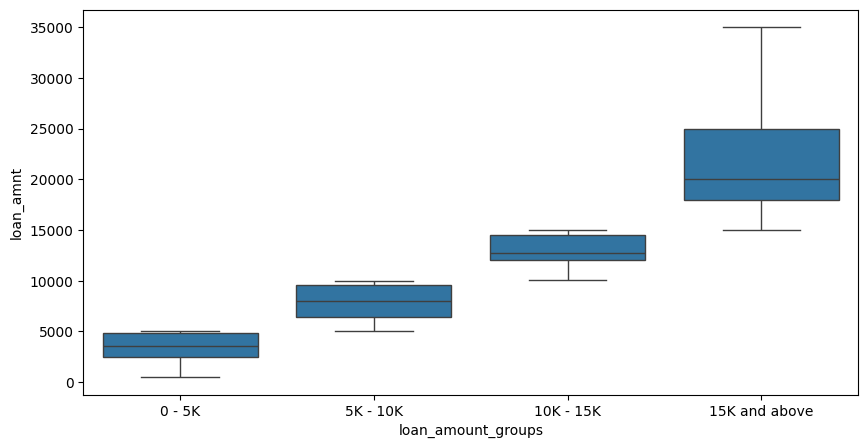

In [54]:
# Plot boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=loan_df.loan_amount_groups, y=loan_df.loan_amnt, )
plt.show()

In [55]:
# Analyze and Derive funded_amount_inv_groups as categorical
loan_df['funded_amnt_inv'].describe()
#loan_df["funded_amnt_inv"].quantile([0.25, 0.50,0.75, 0.90])


count    37074.000000
mean     10226.881350
std       6864.764127
min          0.000000
25%       5000.000000
50%       8825.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [56]:
# Bucketting Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column <= 10000):
        return '5K - 10K'   # median
    elif (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
# create new catergorical column named funded_amount_inv_groups
loan_df['funded_amount_inv_groups'] = loan_df.apply(lambda x : bucket_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)

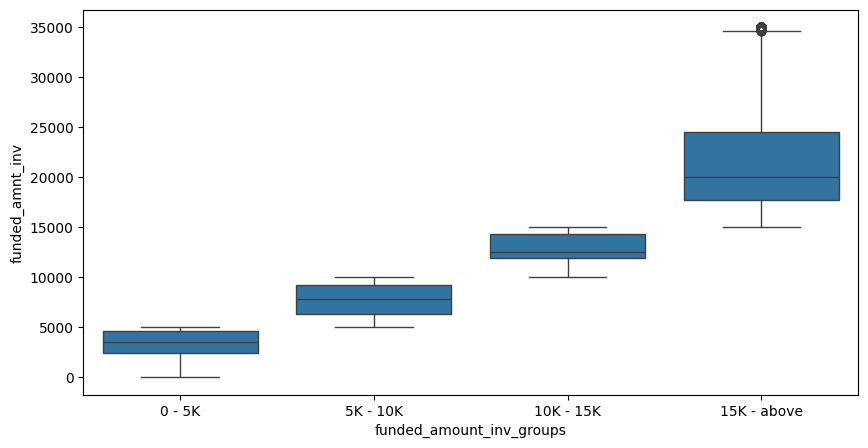

In [57]:
# Validate and plot boxplot for bucket_funded_amount_inv
plt.figure(figsize=(10,5))
sns.boxplot(y=loan_df.funded_amnt_inv,x=loan_df.funded_amount_inv_groups)
plt.show()

In [58]:
# Summarize column funded_amnt and derive funded_amnt_groups column as categorical 
loan_df['funded_amnt'].describe()

count    37074.000000
mean     10652.974456
std       6966.434374
min        500.000000
25%       5031.250000
50%       9250.000000
75%      14800.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [59]:
# Bucketting Funded Amount
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column <= 10000):
        return '5K - 10K'      
    elif (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile

# create new catergorical column named funded_amnt_groups
loan_df['funded_amnt_groups'] = loan_df.apply(lambda x : bucket_funded_amnt(x['funded_amnt']), axis = 1)

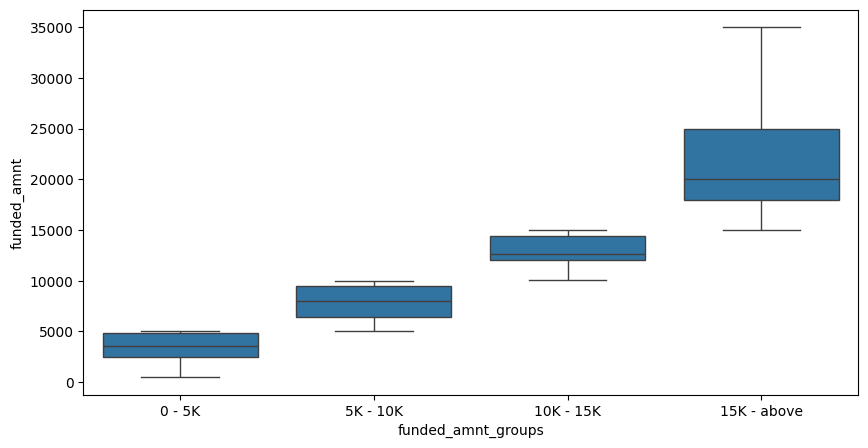

In [60]:
# Validate and plot boxplot for bucket_funded_amnt 
plt.figure(figsize=(10,5))
sns.boxplot(y=loan_df.funded_amnt,x=loan_df.funded_amnt_groups)
plt.show()

In [61]:
# Summarize column annual_inc and derive annual_inc_groups column as categorical 
loan_df['annual_inc'].describe() / 1000

count     37.074000
mean      63.961499
std       32.235783
min        4.000000
25%       40.000000
50%       57.900000
75%       80.000000
max      186.000000
Name: annual_inc, dtype: float64

In [62]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column <= 50000):
        return '40k - 50k'    
    elif (column <= 60000):
        return '50k to 60k'
    elif (column <= 70000):
        return '60k to 70k'
    elif (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile
    
# create new catergorical column named annual_inc_groups
loan_df['annual_inc_groups'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

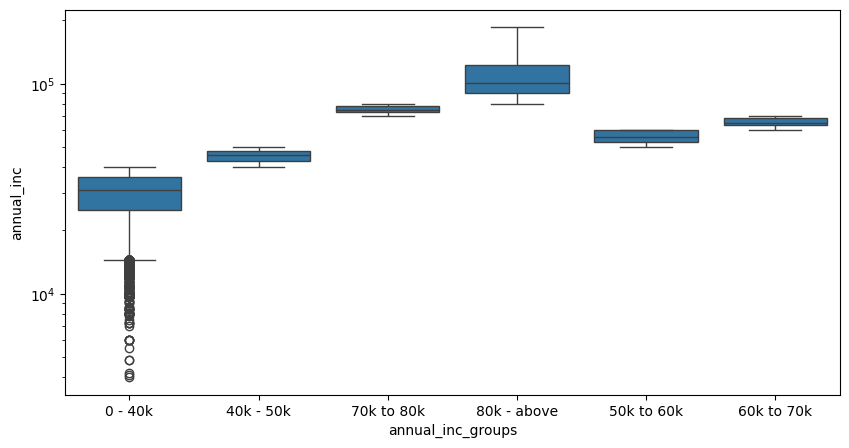

In [63]:
# Validate and plot boxplot for bucket_funded_amnt
# plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize = (10,5))
ax.set(yscale = 'log')
sns.boxplot(y=loan_df.annual_inc,x=loan_df.annual_inc_groups)
plt.show()

In [64]:
# Summarize column int_rate and derive int_rate_groups column as categorical 
loan_df['int_rate'].describe()

count    37074.000000
mean        11.927067
std          3.699108
min          5.420000
25%          8.940000
50%         11.780000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [65]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column <= 11):
        return 'Low'    
    elif (column <= 13):
        return 'Moderate'
    elif (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

# create new catergorical column named int_rate_groups    
loan_df['int_rate_groups'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

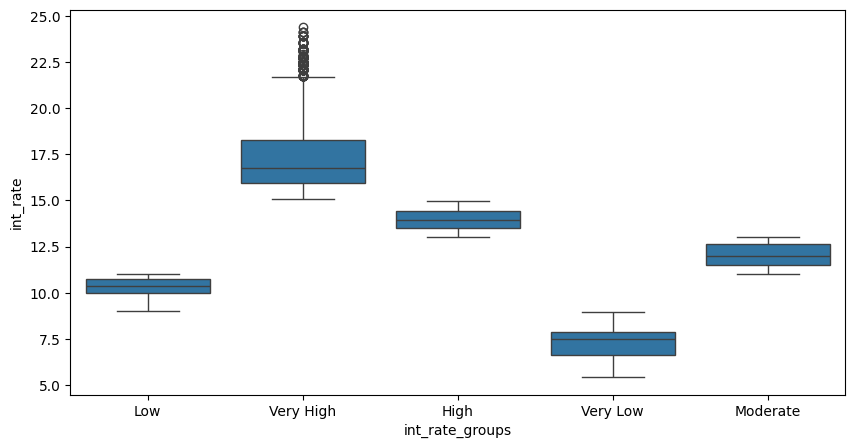

In [66]:
# Validate and plot boxplot for int_rate_groups 
plt.figure(figsize=(10,5))
sns.boxplot(y=loan_df.int_rate,x=loan_df.int_rate_groups)
plt.show()

In [67]:
# Summarize column dti and derive dti_groups column as categorical 
loan_df['dti'].describe()

count    37074.000000
mean        13.415063
std          6.648492
min          0.000000
25%          8.312500
50%         13.520000
75%         18.670000
max         29.990000
Name: dti, dtype: float64

In [68]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column <= 12):
        return 'Low'    
    elif (column <= 16):
        return 'Moderate'
    elif (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
loan_df['dti_groups'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

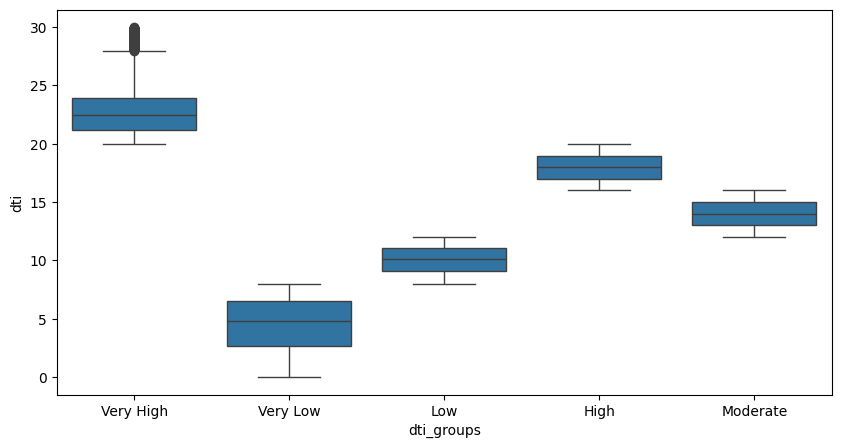

In [69]:
# Validate and plot boxplot for bucket_dti 
plt.figure(figsize=(10,5))
sns.boxplot(y=loan_df.dti,x=loan_df.dti_groups)
plt.show()

####  Univariate Visualization
##### Categorical

In [70]:
# analyzing loan_status  
loan_df["loan_status"].value_counts()

loan_status
Fully Paid     31658
Charged Off     5416
Name: count, dtype: int64

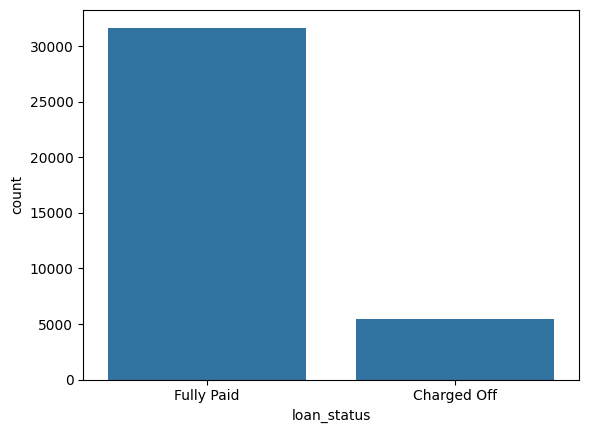

In [71]:
# visualize loan status on basis of Fully paid and charged Off value
sns.countplot(x = 'loan_status', data = loan_df)
plt.show()

# Large number of loans are fully paid

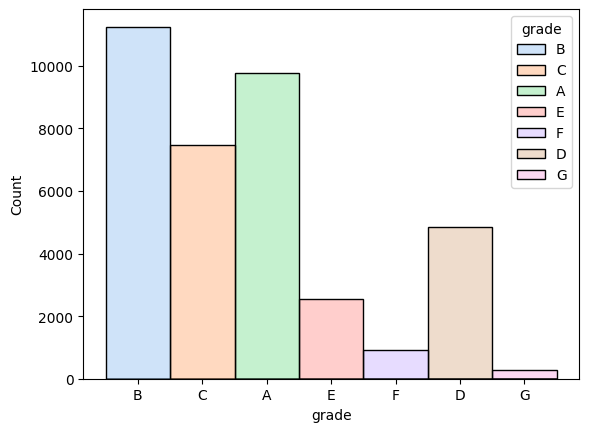

In [72]:
# plot histogram for grade
# loan_df['grade'].value_counts().plot.bar()
sns.histplot(x="grade", data = loan_df, palette="pastel", hue="grade", legend=True )
# sns.color_palette("husl", 9)
plt.show()

- Grade B has highest frequency count of loan application

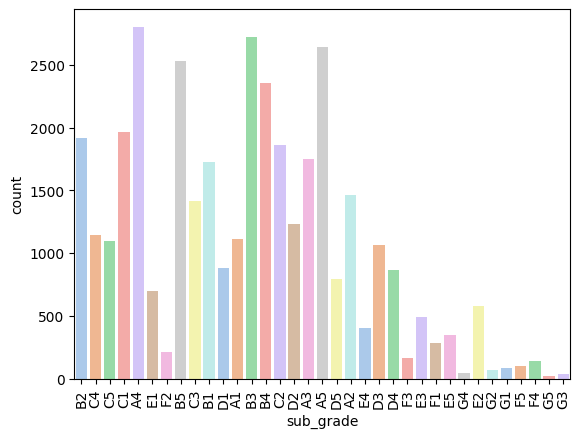

In [73]:
# plot countplot for sub_grade
# loan_df['sub_grade'].value_counts().plot.bar()
sns.countplot(x="sub_grade", data = loan_df , palette="pastel", width=0.8, hue="sub_grade", legend=False)
plt.xticks(rotation=90)
plt.show()

- sub_grade A4 has highest frequency count.

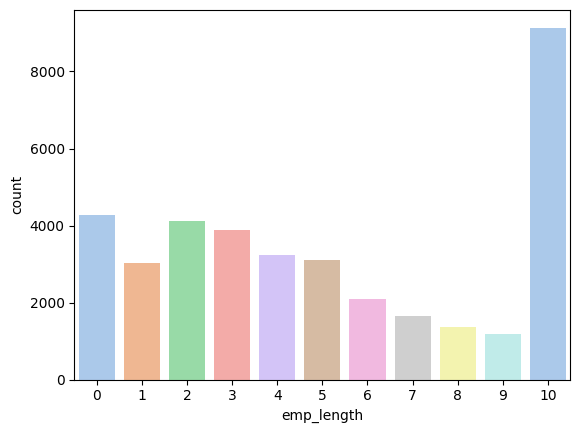

In [74]:

# Plot countplot for emp_length
sns.countplot(x="emp_length", data = loan_df , palette="pastel", width=0.8, hue="emp_length", legend=False)
# plt.xticks(rotation=90)
plt.show()

- Majorty of customers are in employment for 10 and more years while next immediate value is for < 1 year. 

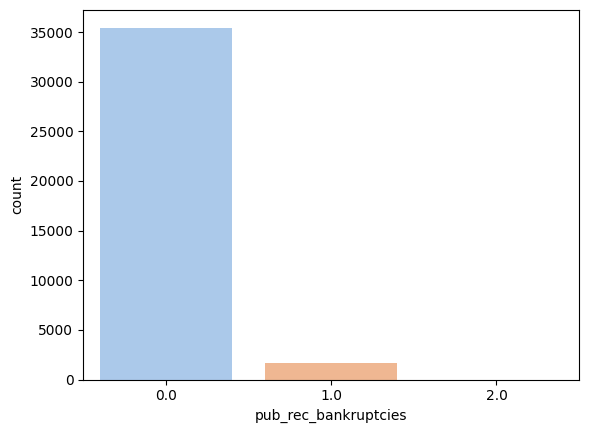

In [75]:
# Plot countplot for pub_rec_bankruptcies 
# sns.countplot(x="pub_rec_bankruptcies", data = loan_df , palette="pastel", width=0.8, hue="emp_length", legend=True)
sns.countplot(x="pub_rec_bankruptcies", data = loan_df , palette="pastel", width=0.8)
# plt.xticks(rotation=90)
plt.show()

- Most of the customers who applied for loans are not in public record of bankruptcies.

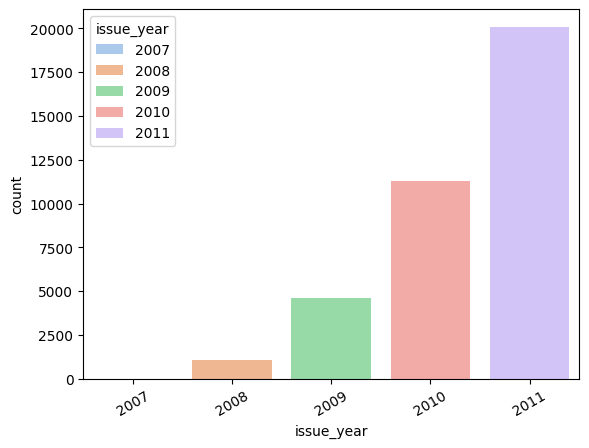

In [76]:
# Plot frequency count for loan issued by year
sns.countplot(x="issue_year", data = loan_df , palette="pastel", width=0.8, hue="issue_year", legend=True)
plt.xticks(rotation=30)
plt.show()

- Number of approved loans are inceasing each year and year 2011 has the max loan approved.

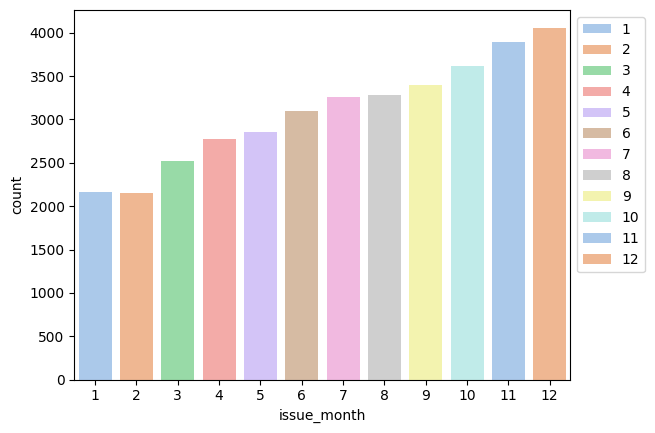

In [77]:
# Plot frequency count for loan issued by month
sns.countplot(x="issue_month", data = loan_df , palette="pastel", width=0.8, hue="issue_month", legend=True)
#plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

- The is some trend is loan approval. Feb has slightly less no of loans approved while approved loan counts incerease each month and December has the highest value.

In [78]:
# analyze home or mortgage ownership
loan_df["home_ownership"].value_counts()

home_ownership
RENT        17914
MORTGAGE    16210
OWN          2857
OTHER          93
Name: count, dtype: int64

In [79]:
# only 3 records has None value in home_ownership, lets replace it with 'other'
# loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True
loan_df['home_ownership'] = np.where(loan_df['home_ownership']=='NONE','OTHER',loan_df['home_ownership'])

# check unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

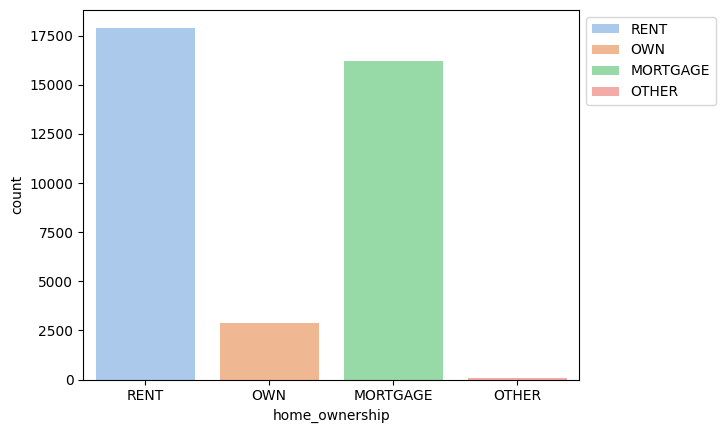

In [80]:
# plot countplot for house_ownership
sns.countplot(x="home_ownership", data = loan_df , palette="pastel", width=0.8, hue="home_ownership", legend=True)
# plt.xticks(rotation=10)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

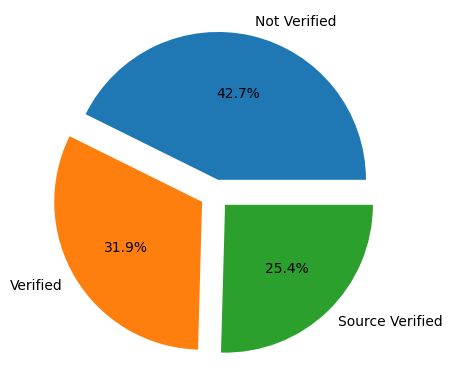

In [81]:
# Plot pie chart to display verification status
user_verified_counts = loan_df.verification_status.value_counts()
plt.pie(user_verified_counts, labels = user_verified_counts.index, autopct='%1.1f%%',explode=[0.1,0.1,0.1])
plt.show()

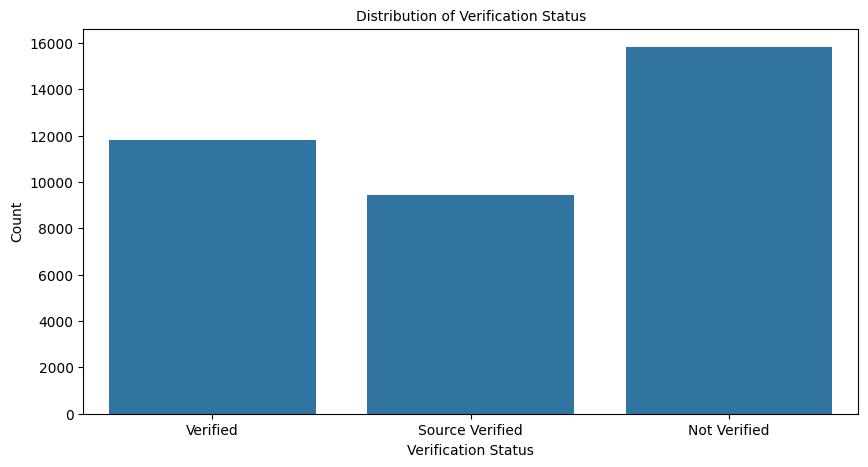

In [82]:
# Distribution of verification_status
plt.figure(figsize=(10,5))

sns.countplot(x=loan_df.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=10)

plt.show()

# Large Frequency of loan application is yet to be verified

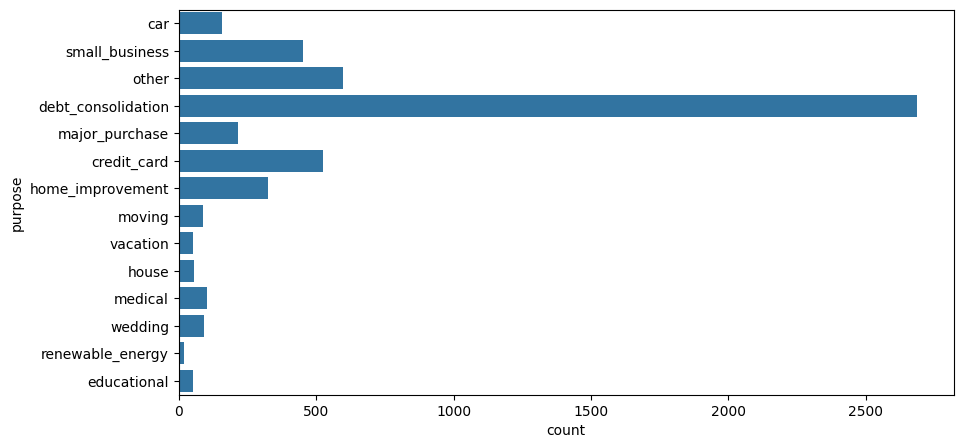

In [83]:
# analyze purpose column
fig, ax = plt.subplots(figsize = (10,5))
# ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

- debt_consolidation is the major purpose for seeking loan.

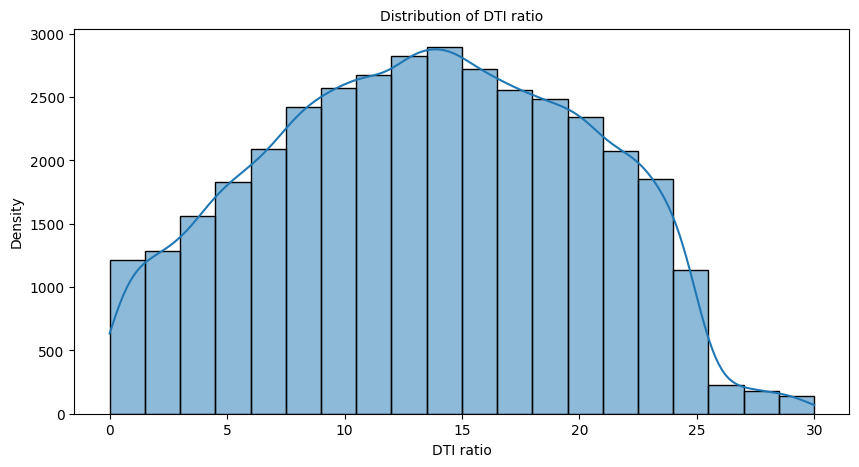

In [84]:
# Distribution of dti is symetrical to bell curve
plt.figure(figsize=(10,5))

sns.histplot(loan_df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=10)

plt.show()

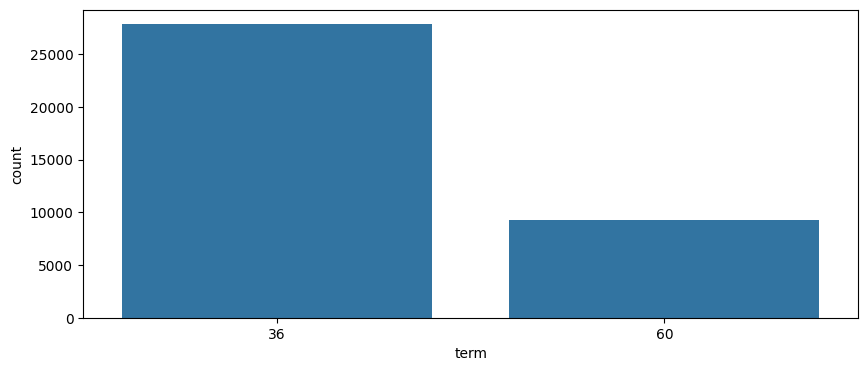

In [85]:
# loan_df['term'].value_counts().plot.bar()
# analyze term column
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x ='term', data=loan_df)
plt.show()
# most of the loans are 36 month long duration

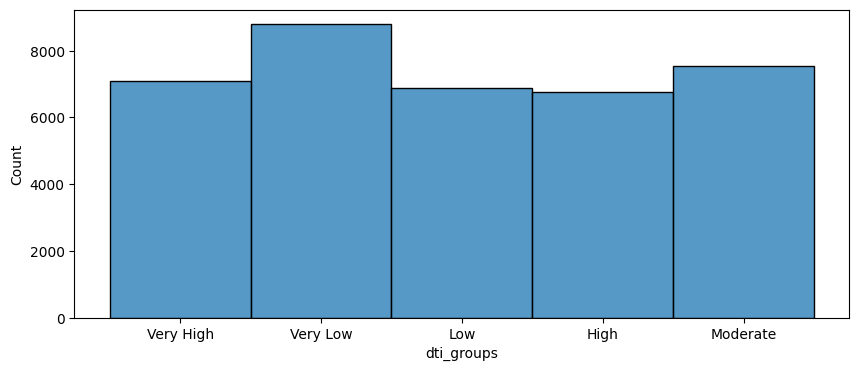

In [86]:
# Large number of loan applications are in Moderate debt to income ratio
fig, ax = plt.subplots(figsize = (10,4))
sns.histplot(x ='dti_groups', data=loan_df)
plt.show()

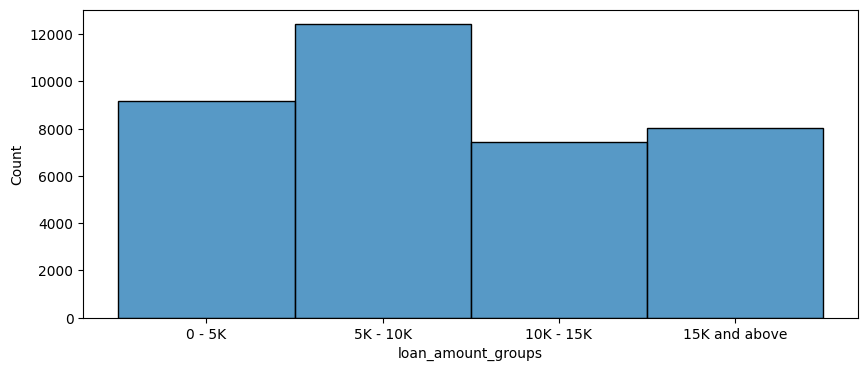

In [87]:
# Large number of loan applications fall in the range of 5k - 10k.
# loan_df["loan_amount_groups"].value_counts().plot.bar() 
fig, ax = plt.subplots(figsize = (10,4))
sns.histplot(x ='loan_amount_groups', data=loan_df)
plt.show()

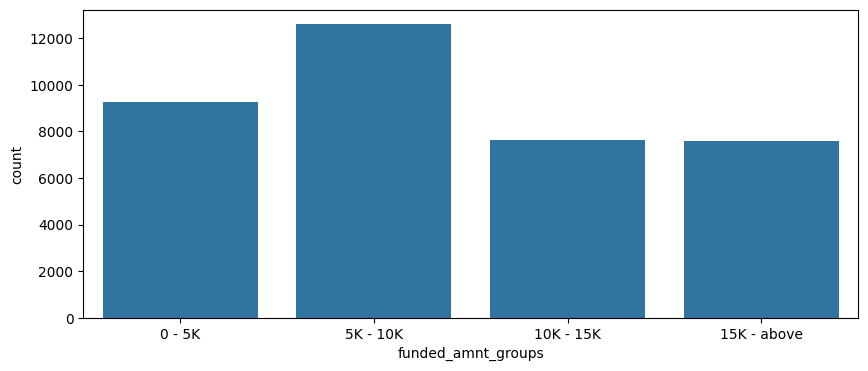

In [88]:
# Large number of loan amount applications fall in the range of 5k to 10k
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x ='funded_amnt_groups', data=loan_df)
plt.show()

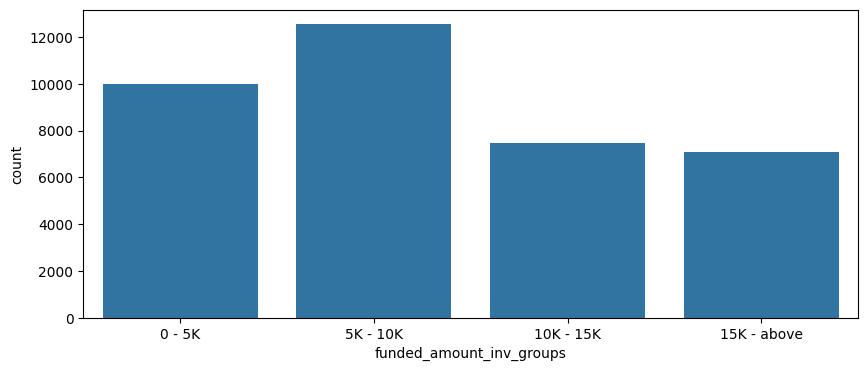

In [89]:
# Large number of loan amount applications fall in the range of 5k to 10k.
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x ='funded_amount_inv_groups', data=loan_df)
plt.show()

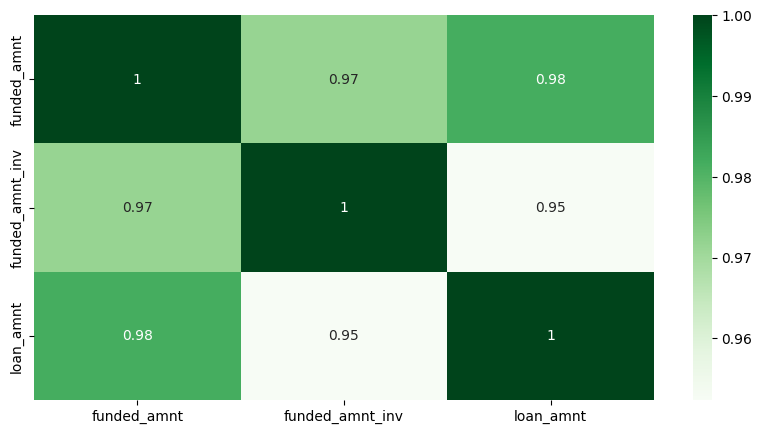

In [90]:
# Identify key correlations between funded, funded_amnt_inv, loan_amnt
corr = loan_df.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, cmap='Greens')
plt.show()
# The loan_amt, funded_amt and funded_amt_inv may is highly positively correlated.

In [91]:
# drop funded_amt and funded_amt_inv
loan_df.drop(['funded_amnt_inv', 'funded_amnt'],  axis=1, inplace= True)

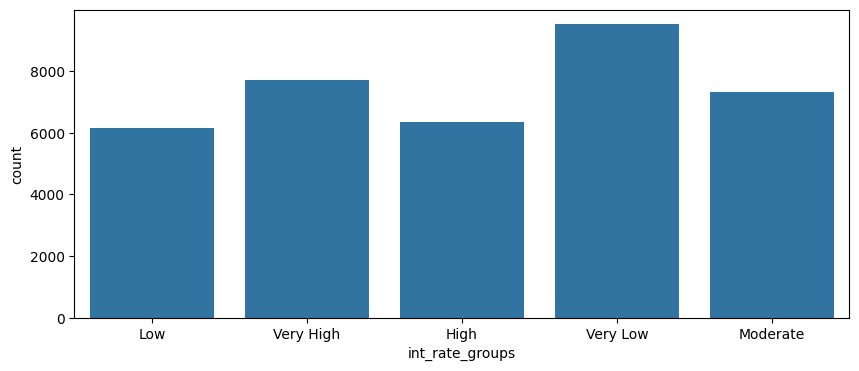

In [92]:
# Large number of loan amount applications are in the category of "Very Low" interest rates
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x ='int_rate_groups', data=loan_df)
plt.show()

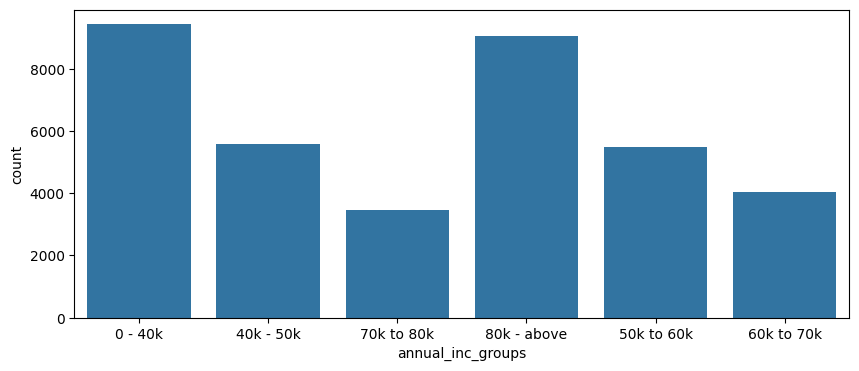

In [93]:
# Large number of loan amount applications are in the range of 0 - 40K anual income
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x ='annual_inc_groups', data=loan_df)
plt.show()

<Axes: xlabel='loan_status', ylabel='count'>

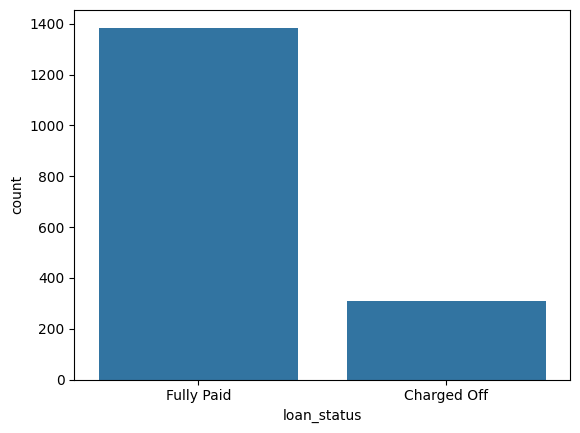

In [94]:
# Scaling down the Loan amount shows a low number of defaults. So whatever considerations made in planning on scaling have done well in reducing defaults. 
sns.countplot(x = 'loan_status', data = loan_df[loan_df['loan_scaling?']=='Yes'])

##### Uniariate summary and Observations 
- Large number of loan amount applications are in the range of 0 - 40K anual income.
- Large number of loan applications fall in the range of 5k - 10k.
- debt_consolidation is the major purpose for seeking loan.
- Majorty of customers are in employment for 10 and more years while next immediate value is for < 1 year.
- Median value for interest rate is 11.78
- Median value for loan amount is 9600
- Scaling down the Loan amount shows a low number of defaults. So whatever considerations made in planning on scaling have done well in reducing defaults. 

#### Bivariate Analysis

In [95]:
m36_term_int_rate_rl = loan_df.query("term==36").pivot_table(index='loan_status',columns='int_rate_groups',values='id',aggfunc={'id':'nunique'})
m36_term_int_rate_rl = m36_term_int_rate_rl.apply(lambda x: x/m36_term_int_rate_rl.sum(axis=1)).reset_index()
m60_term_int_rate_rl = loan_df.query("term==60").pivot_table(index='loan_status',columns='int_rate_groups',values='id',aggfunc={'id':'nunique'})
m60_term_int_rate_rl = m60_term_int_rate_rl.apply(lambda x: x/m60_term_int_rate_rl.sum(axis=1)).reset_index()

m36_term_int_rate_rl_melted = m36_term_int_rate_rl.melt(id_vars='loan_status', var_name='int_rate_groups', value_name='percentage')
m60_term_int_rate_rl_melted = m60_term_int_rate_rl.melt(id_vars='loan_status', var_name='int_rate_groups', value_name='percentage')


Text(0.5, 1.0, '60 Month Term')

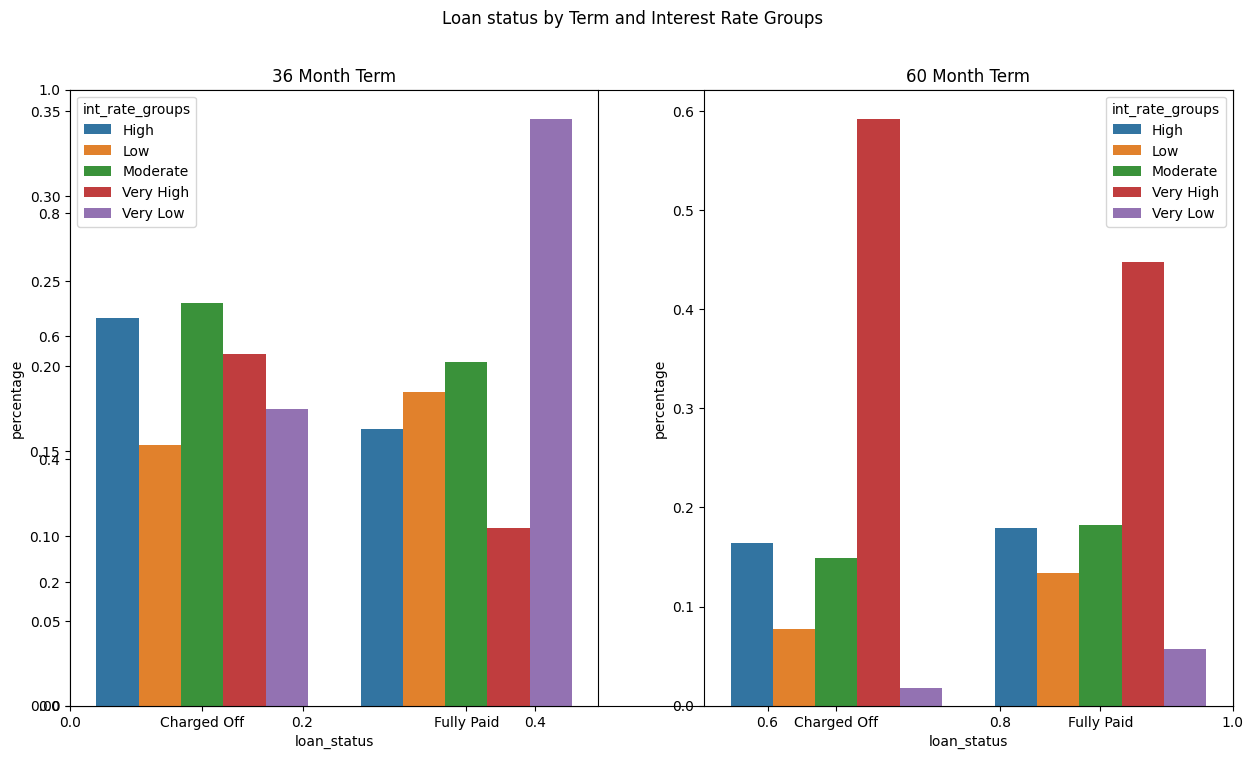

In [96]:
# Plotting
fig, ax = plt.subplots(figsize = (15,8))
plt.suptitle("Loan status by Term and Interest Rate Groups", fontsize=12)

plt.subplot(121)
sns.barplot(x='loan_status', y='percentage', hue='int_rate_groups', data=m36_term_int_rate_rl_melted)
plt.title("36 Month Term")

plt.subplot(122)
sns.barplot(x='loan_status', y='percentage', hue='int_rate_groups', data=m60_term_int_rate_rl_melted)
plt.title("60 Month Term")


The above graph clearly indicates a significant increase in the percentage of defaults compared to fully paid loans, as follows:
Higher Default Probability:

- 13% - 17% Interest Rate Group with 36 Months Term: There is a high probability of defaulting (charged-off loans) compared to fully paid loans within this category.
- 17% - 21% Interest Rate Group with 60 Months Term: There is also a high probability of defaulting within this category.

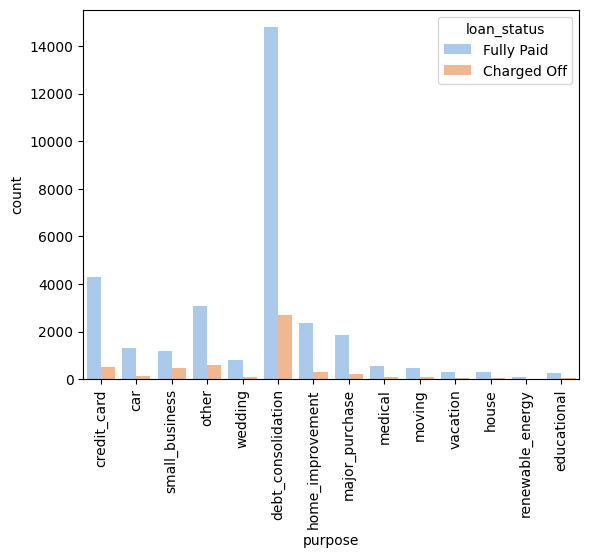

In [97]:
# Plot frequency count loan issued over year based on 'purpose'
sns.countplot(x="purpose", data = loan_df , palette="pastel", width=0.8, hue="loan_status", legend=True)
plt.xticks(rotation=90)
plt.show()

In [98]:
# Ploting pivot table with charge off ratio
pivot_tb = pd.pivot_table(loan_df, values="annual_inc_groups", index=['purpose'],
                       columns=['loan_status'], aggfunc=len).reset_index()
pivot_tb["total"] = pivot_tb['Charged Off'] + pivot_tb['Fully Paid']
pivot_tb['charge_off_ratio'] = round(pivot_tb['Charged Off'] / pivot_tb['total'] * 100)
pivot_tb

## small buiness has highest charge off ratio and is risky for loan

loan_status,purpose,Charged Off,Fully Paid,total,charge_off_ratio
0,car,156,1305,1461,11.0
1,credit_card,525,4314,4839,11.0
2,debt_consolidation,2686,14789,17475,15.0
3,educational,51,247,298,17.0
4,home_improvement,324,2367,2691,12.0
5,house,56,293,349,16.0
6,major_purchase,214,1868,2082,10.0
7,medical,104,548,652,16.0
8,moving,87,468,555,16.0
9,other,599,3076,3675,16.0


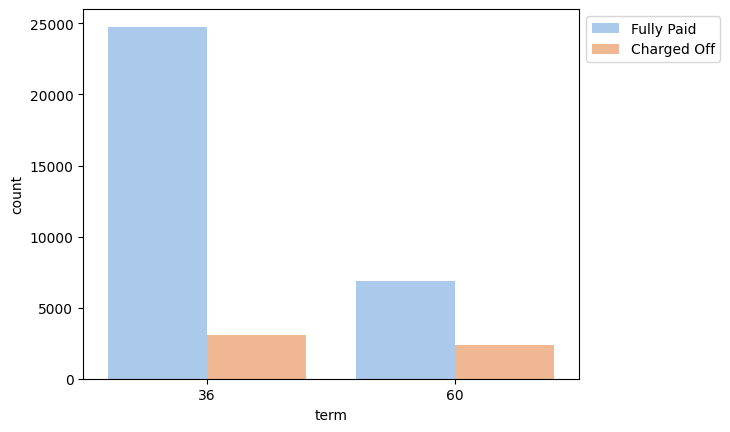

loan_status,term,Charged Off,Fully Paid,total,charge_off_ratio
0,36,3054,24765,27819,11.0
1,60,2362,6893,9255,26.0


In [99]:
sns.countplot(x="term", data = loan_df , palette="pastel", width=0.8, hue="loan_status", legend=True)
#plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Ploting pivot table with charge off ratio
pivot_tb = pd.pivot_table(loan_df, values="annual_inc_groups", index=['term'],
                       columns=['loan_status'], aggfunc=len).reset_index()
pivot_tb["total"] = pivot_tb['Charged Off'] + pivot_tb['Fully Paid']
pivot_tb['charge_off_ratio'] = round(pivot_tb['Charged Off'] / pivot_tb['total'] * 100)
pivot_tb
# long term loan has high change of default as charge of ratio is higher.

In [100]:
loan_df.head(3)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,issue_year,issue_month,loan_scaling?,int_rate_groups,loan_amount_groups,funded_amount_inv_groups,funded_amnt_groups,annual_inc_groups,dti_groups
0,1077501,5000.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,0.0,2011,12,No,Low,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very High
1,1077430,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,0.0,2011,12,No,Very High,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very Low
2,1077175,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,0.0,2011,12,No,Very High,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Low


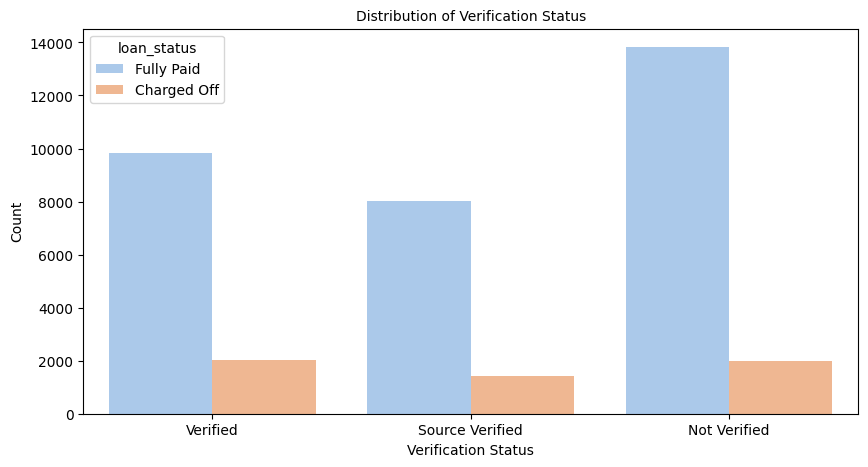

loan_status,verification_status,Charged Off,Fully Paid,total,charge_off_ratio
0,Not Verified,1999,13825,15824,13.0
1,Source Verified,1410,8021,9431,15.0
2,Verified,2007,9812,11819,17.0


In [101]:
# Distribution of verification_status
plt.figure(figsize=(10,5))

sns.countplot(x="verification_status", data = loan_df,palette="pastel", width=0.8, hue="loan_status", legend=True)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=10)

plt.show()

# Ploting pivot table with charge off ratio
pivot_tb = pd.pivot_table(loan_df, values="annual_inc_groups", index=['verification_status'],
                       columns=['loan_status'] , aggfunc=len).reset_index()
pivot_tb["total"] = pivot_tb['Charged Off'] + pivot_tb['Fully Paid']
pivot_tb['charge_off_ratio'] = round(pivot_tb['Charged Off'] / pivot_tb['total'] * 100)
pivot_tb

# Large Frequency of loan application is yet to be verified still it has 13.0 charge_off_ratio. Thus, verification_status is not a driving factor.

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Loan Amount')]

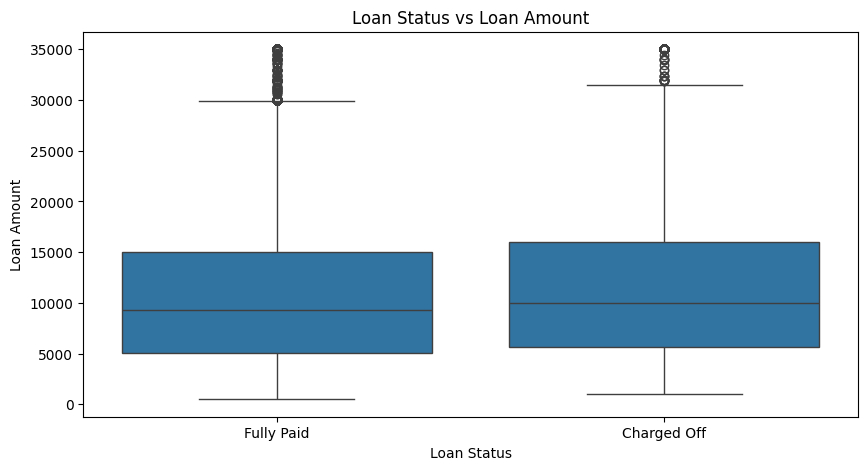

In [102]:
# Numerical vs Categorical
# sns.boxplot(x=loan_df["loan_status"], y=loan_df["loan_amnt"])
plt.figure(figsize=(10,5))
ax=sns.boxplot(x=loan_df["loan_status"], y=loan_df["loan_amnt"])
ax.set_title('Loan Status vs Loan Amount')
ax.set(xlabel='Loan Status', ylabel='Loan Amount')

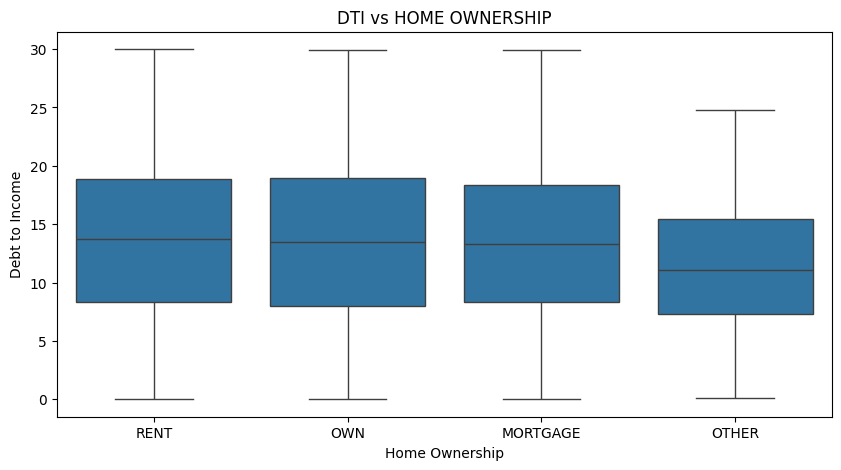

In [103]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='home_ownership',y='dti',data=loan_df)
ax.set(xlabel='Home Ownership', ylabel='Debt to Income')
ax.set_title('DTI vs HOME OWNERSHIP')
plt.show()

- OTHERS category in home ownership has less debt to income ratio

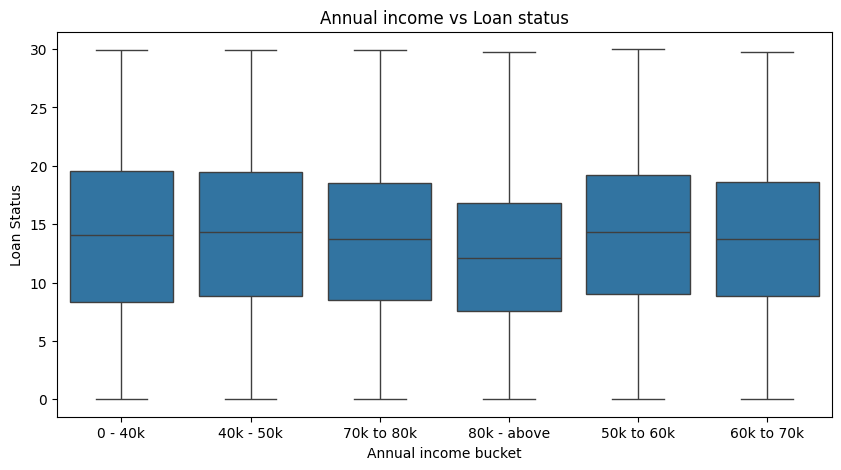

loan_status,annual_inc_groups,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1705,7734,9439,18.0
1,40k - 50k,847,4744,5591,15.0
2,50k to 60k,854,4634,5488,16.0
3,60k to 70k,543,3484,4027,13.0
4,70k to 80k,451,3011,3462,13.0
5,80k - above,1016,8051,9067,11.0


In [104]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=loan_df.annual_inc_groups, y=loan_df.dti)
ax.set(xlabel='Annual income bucket', ylabel='Loan Status')
ax.set_title('Annual income vs Loan status')
plt.show()

# Ploting pivot table with charge off ratio
pivot_tb = pd.pivot_table(loan_df, values="dti", index=['annual_inc_groups'],
                       columns=['loan_status'], aggfunc=len).reset_index()
pivot_tb["total"] = pivot_tb['Charged Off'] + pivot_tb['Fully Paid']
pivot_tb['charge_off_ratio'] = round(pivot_tb['Charged Off'] / pivot_tb['total'] * 100)
pivot_tb

In [105]:
# Ploting pivot table with charge off ratio
pivot_tb = pd.pivot_table(loan_df, values="dti", index=['annual_inc_groups'],
                       columns=['loan_status'], aggfunc=len).reset_index()
pivot_tb["total"] = pivot_tb['Charged Off'] + pivot_tb['Fully Paid']
pivot_tb['charge_off_ratio'] = round(pivot_tb['Charged Off'] / pivot_tb['total'] * 100)
pivot_tb

loan_status,annual_inc_groups,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1705,7734,9439,18.0
1,40k - 50k,847,4744,5591,15.0
2,50k to 60k,854,4634,5488,16.0
3,60k to 70k,543,3484,4027,13.0
4,70k to 80k,451,3011,3462,13.0
5,80k - above,1016,8051,9067,11.0


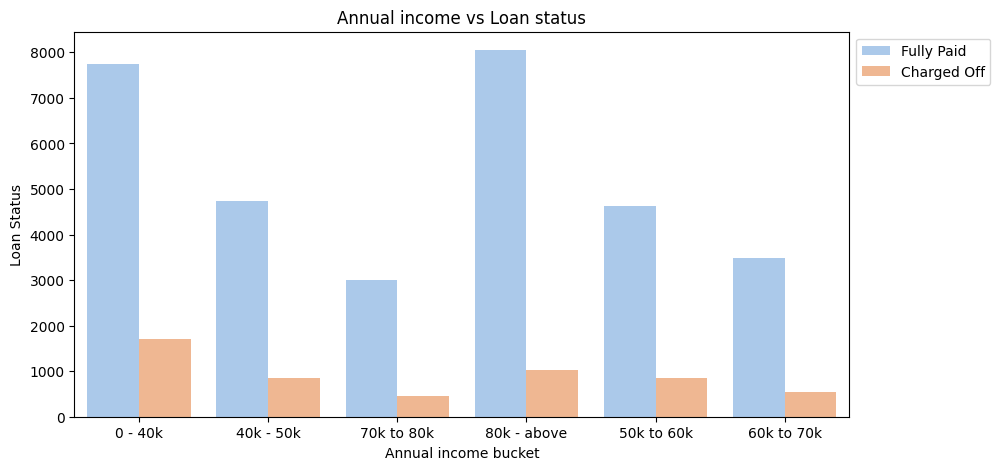

In [106]:
# People with higher income amd in range of 80K+ has low charge offs
plt.figure(figsize=(10,5))
ax= sns.countplot(x="annual_inc_groups", data = loan_df , palette="pastel", width=0.8, hue="loan_status", legend=True)
#plt.xticks(rotation=0)
ax.set(xlabel='Annual income bucket', ylabel='Loan Status')
ax.set_title('Annual income vs Loan status')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

- People with annual income range of 0-40K has the highest charge offs
- People with higher income amd in range of 80K+ has low charge offs

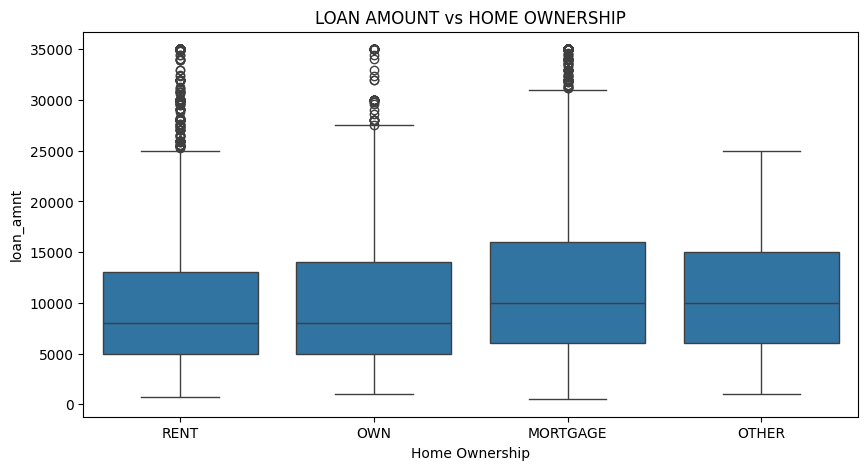

In [107]:
# Plot boxlot for loan amount and home ownership
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='home_ownership',y='loan_amnt',data=loan_df)
ax.set(xlabel='Home Ownership', ylabel='loan_amnt')
ax.set_title('LOAN AMOUNT vs HOME OWNERSHIP')
plt.show()

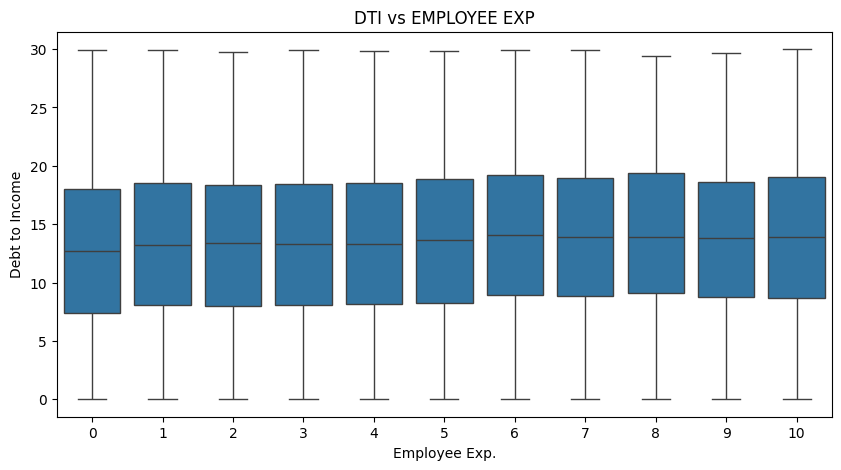

In [108]:
# Plot boxlot for dti and Employee Exp
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='emp_length',y='dti',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

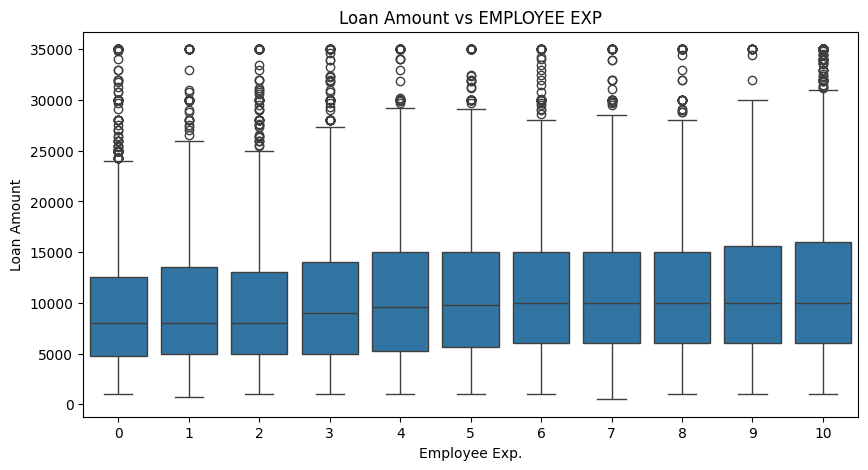

In [109]:
# Plot boxplot for loan amount and Employee Exp
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='emp_length',y='loan_amnt',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP')
plt.show()

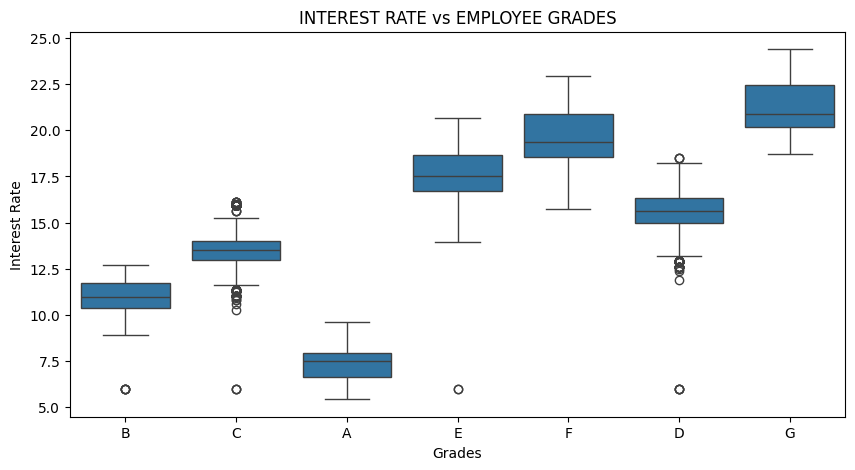

In [110]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='grade',y='int_rate',data=loan_df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

- customer with Grade A has lowest interest rate while Grade G has highest rate of interest. Intrest rates increases gradually moving form A to G.

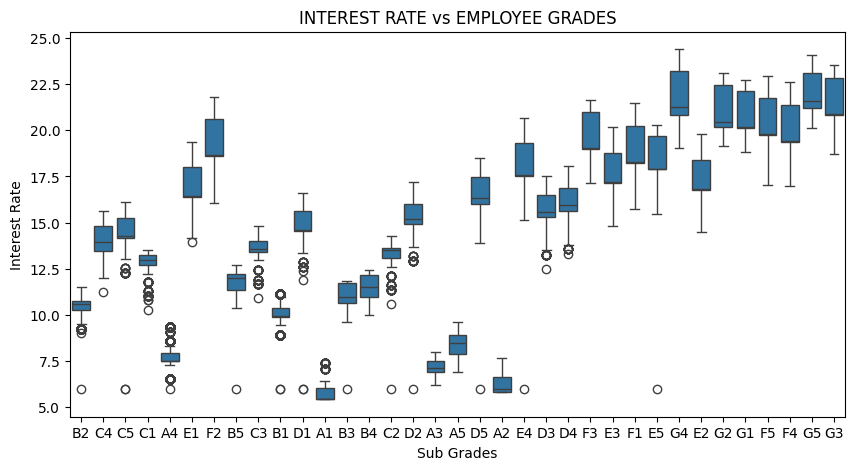

In [111]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='sub_grade',y='int_rate',data=loan_df,)
ax.set(xlabel='Sub Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

- A1 sub_grade has lowest rate of interest

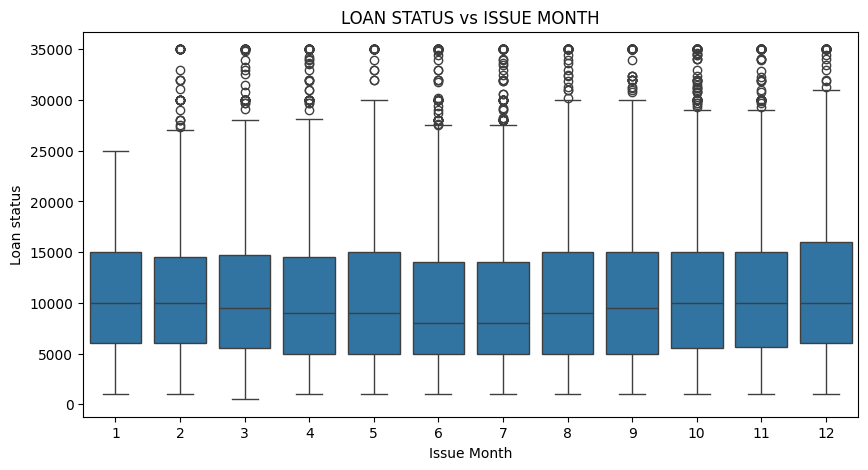

In [112]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='issue_month',y='loan_amnt',data=loan_df,)
ax.set(xlabel='Issue Month', ylabel='Loan status',title='LOAN STATUS vs ISSUE MONTH')
plt.show()

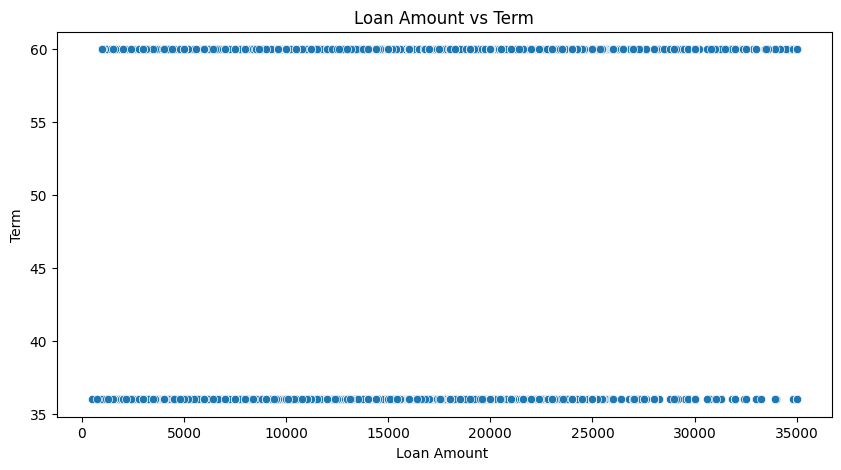

In [113]:
# Numerical vs Numerical
# sns.scatterplot(y=loan_df["term"], x=loan_df["loan_amnt"])
plt.figure(figsize=(10,5))
ax=sns.scatterplot(y=loan_df["term"], x=loan_df["loan_amnt"])
ax.set(xlabel='Loan Amount ', ylabel='Term',title='Loan Amount vs Term')
plt.show()

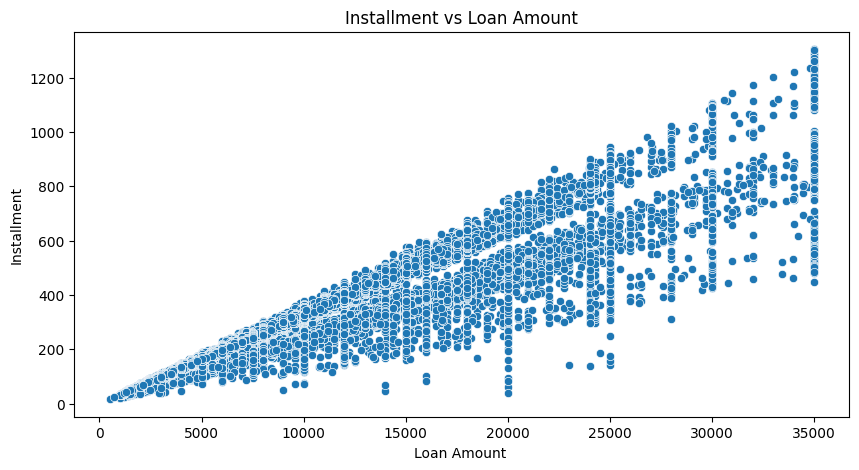

In [114]:

# sns.scatterplot(y=loan_df["installment"], x=loan_df["loan_amnt"])
plt.figure(figsize=(10,5))
ax=sns.scatterplot(y=loan_df["installment"], x=loan_df["loan_amnt"])
ax.set(xlabel='Loan Amount ', ylabel='Installment',title='Installment vs Loan Amount')
plt.show()

- with increase in loan amount installment per month also increases lineraly.

In [115]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month', 'loan_scaling?', 'int_rate_groups', 'loan_amount_groups',
       'funded_amount_inv_groups', 'funded_amnt_groups', 'annual_inc_groups',
       'dti_groups'],
      dtype='object')

#### Observations and Bivariate Summary
- There is High probability to default at 13%-17% interest rate with 36 months term duration
- There is High probability to default at 17%-21% interest rate with 60 months term duration
- small buiness has highest charge off ratio and is risky for loan.
- long term loan has high change of default as charge of ratio is higher.
- People with annual income range of 0-40K has the highest charge offs
- People with higher income amd in range of 80K+ has low charge offs.
- customer with Grade A has lowest interest rate while Grade G has highest rate of interest. Intrest rates increases gradually moving form A to G.
- sub grade A1 has lowest rate of interest.